In [1]:
import stata_setup
stata_setup.config("C:/Program Files/Stata17/", "mp")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 4-core  perpetual
Serial number: 501706303466
  Licensed to: David Tomas Jacho-Chavez
               Emory University

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


## Ridge Regression

The ridge regression estimator

$$
\widehat{\beta}_{\text {ridge }}=\left(\boldsymbol{X}^{\prime} \boldsymbol{X}+\lambda \boldsymbol{I}_{p}\right)^{-1} \boldsymbol{X}^{\prime} \boldsymbol{Y}
$$

where $\lambda>0$ is called the _ridge_ parameter.

In [2]:
%%stata -eret steret
use https://www.stata-press.com/data/r17/breathe, clear
quietly do https://www.stata-press.com/data/r17/no2
display "$cc"
display "$fc"
quietly elasticnet linear react no2_class $cc i.($fc), alpha(0) lambda(5.34) nolog


. use https://www.stata-press.com/data/r17/breathe, clear
(Nitrogen dioxide and attention)

. quietly do https://www.stata-press.com/data/r17/no2

. display "$cc"
no2_home age age0 sev_home green_home noise_school sev_school precip siblings_o
> ld siblings_young

. display "$fc"
sex grade overweight lbweight breastfeed msmoke meducation feducation

. quietly elasticnet linear react no2_class $cc i.($fc), alpha(0) lambda(5.34) 
> nolog

. 


In [3]:
steret['e(b)']

array([[ 2.29961589e-01,  7.19709255e-03, -7.79693859e+00,
         5.74574982e-01,  6.06413940e+00, -3.52607533e+00,
         6.68343036e-02, -1.89343420e+00, -1.73832297e-01,
        -8.31931169e-01,  1.07094386e+00, -7.25895432e+00,
         7.25895432e+00,  1.40836299e+01, -3.97196296e+00,
        -1.25150209e+01, -8.32688611e-01,  8.32688611e-01,
         2.31593189e+00, -2.31593189e+00,  6.41138933e-01,
        -1.03166138e+00,  8.40362065e-01,  2.77440061e+00,
        -2.77440061e+00, -1.52163825e+01,  8.46798521e+00,
         7.06684098e-01, -2.51228437e+00, -3.81572420e+00,
         7.17102626e+00,  3.04649534e+00, -4.66411406e+00,
         7.98804501e+02]])

In [4]:
%%stata
elasticnet linear react no2_class $cc i.($fc), alpha(0) lambda(0.1(.005)0.3) folds(1036) nolog


Elastic net linear model                         No. of obs        =      1,036
                                                 No. of covariates =         33
Selection: Cross-validation                      No. of CV folds   =      1,036

-------------------------------------------------------------------------------
               |                               No. of      Out-of-      CV mean
               |                              nonzero       sample   prediction
alpha       ID |     Description      lambda    coef.    R-squared        error
---------------+---------------------------------------------------------------
0.000          |
             1 |    first lambda          .3       33       0.1982     16708.13
            15 |   lambda before         .23       33       0.1985     16701.84
          * 16 | selected lambda        .225       33       0.1985     16701.79
            17 |    lambda after         .22       33       0.1985     16701.81
            41 |     

In [5]:
%%stata
use https://www.stata-press.com/data/r17/breathe, clear
quietly do https://www.stata-press.com/data/r17/no2
display "$cc"
display "$fc"
quietly elasticnet linear react no2_class $cc i.($fc), alpha(0) lambda(0.225) nolog
matrix list r(table)


. use https://www.stata-press.com/data/r17/breathe, clear
(Nitrogen dioxide and attention)

. quietly do https://www.stata-press.com/data/r17/no2

. display "$cc"
no2_home age age0 sev_home green_home noise_school sev_school precip siblings_o
> ld siblings_young

. display "$fc"
sex grade overweight lbweight breastfeed msmoke meducation feducation

. quietly elasticnet linear react no2_class $cc i.($fc), alpha(0) lambda(2.25) 
> nolog

. matrix list r(table)

r(table)[9,34]
                                                                             
           no2_class      no2_home           age          age0      sev_home
     b     2.4089832    -.13157689    -28.594605     5.6168192     26.057464
    se     .51922022     .29480143     11.411889     3.1498828     23.139224
     t     4.6396176    -.44632377    -2.5056855     1.7831836     1.1261166
pvalue     3.949e-06     .65545906     .01237783     .07485666     .26038369
    ll     1.3901093    -.71007031    -50.988333    -.564


. predict reac_hat, xb
(option penalized assumed; linear prediction with penalized coefficients)

. gen ehat = react - reac_hat
(53 missing values generated)

. set scheme s1mono

. histogram ehat
(bin=30, start=-250.7589, width=25.362692)

. 


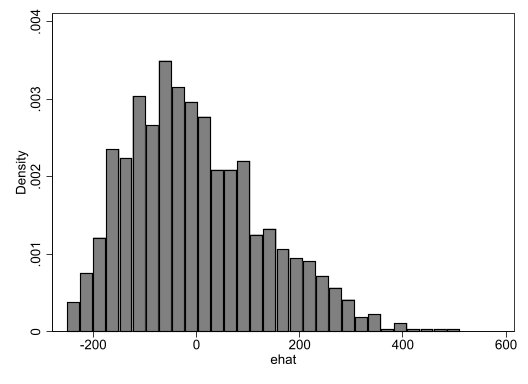

In [6]:
%%stata
predict reac_hat, xb
gen ehat = react - reac_hat
set scheme s1mono
histogram ehat